In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df =pd.read_csv('vgsales.csv')



In [24]:
df['Publisher'].nunique()

display(df)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


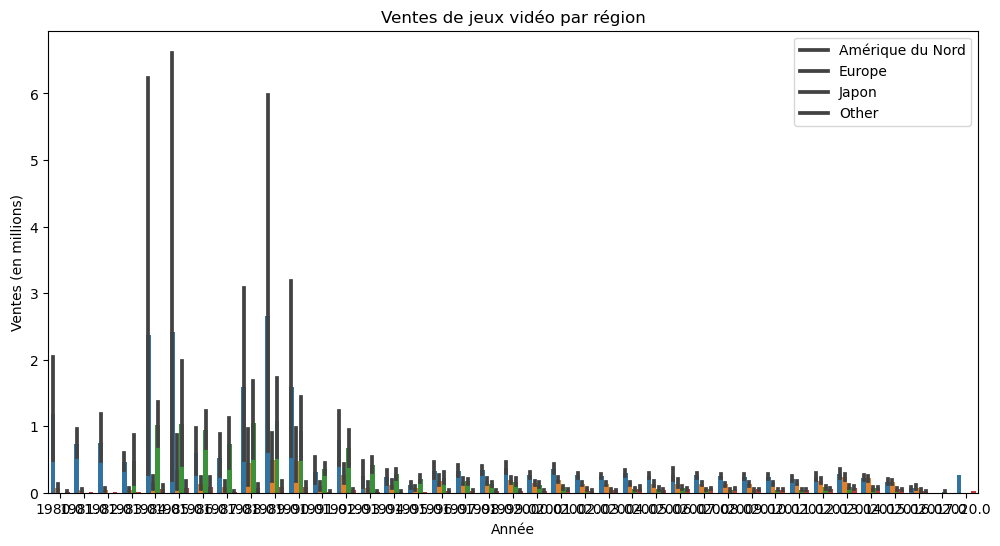

In [17]:

df_melted = pd.melt(df, id_vars='Year', value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                    var_name='Region', value_name='Sales')

plt.figure(figsize=(12,6))
sns.barplot(x='Year', y='Sales', hue='Region', data=df_melted)
plt.xlabel('Année')
plt.ylabel('Ventes (en millions)')
plt.title('Ventes de jeux vidéo par région')
plt.legend(labels=['Amérique du Nord', 'Europe', 'Japon','Other'])
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


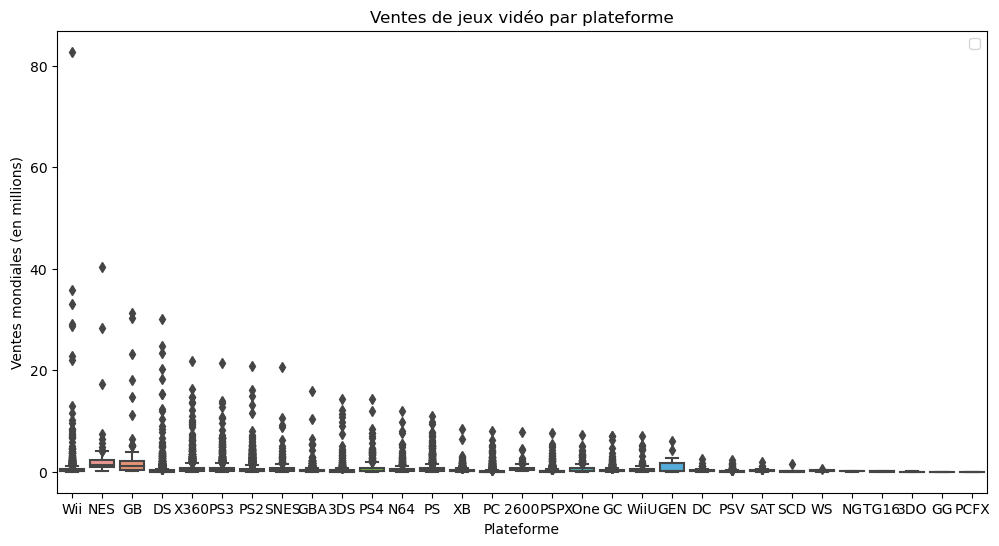

In [5]:


plt.figure(figsize=(12,6))
sns.boxplot(x='Platform', y='Global_Sales', data=df)
plt.xlabel('Plateforme')
plt.ylabel('Ventes mondiales (en millions)')
plt.title('Ventes de jeux vidéo par plateforme')
plt.legend()
plt.show()


c:\Users\grego\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


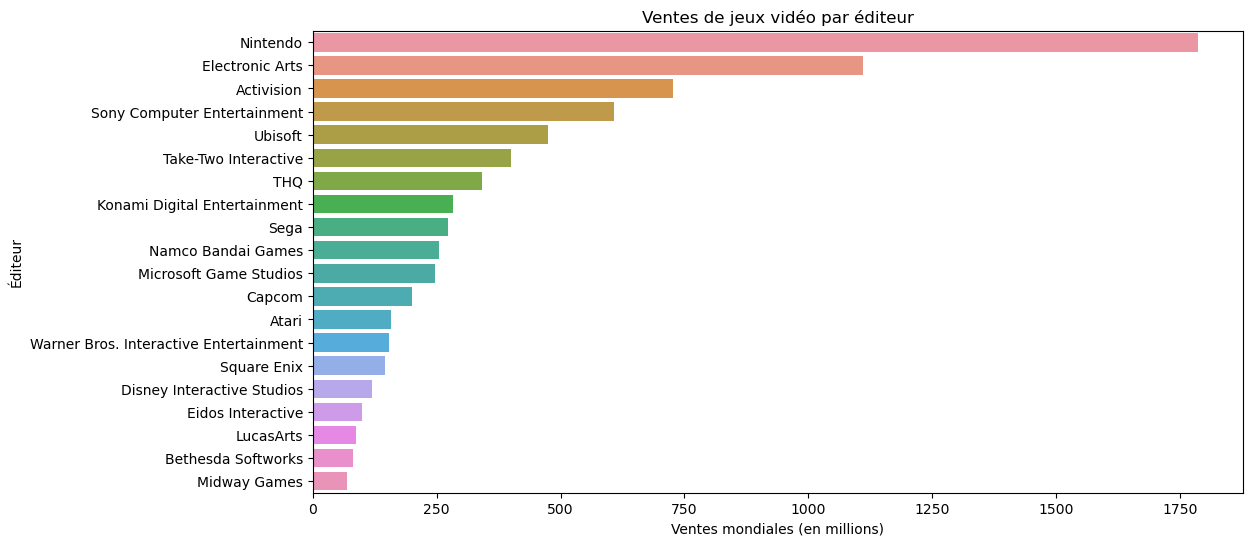

In [6]:
publisher_sales = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
sns.barplot(publisher_sales.values, publisher_sales.index)
plt.xlabel('Ventes mondiales (en millions)')
plt.ylabel('Éditeur')
plt.title('Ventes de jeux vidéo par éditeur')
plt.show()


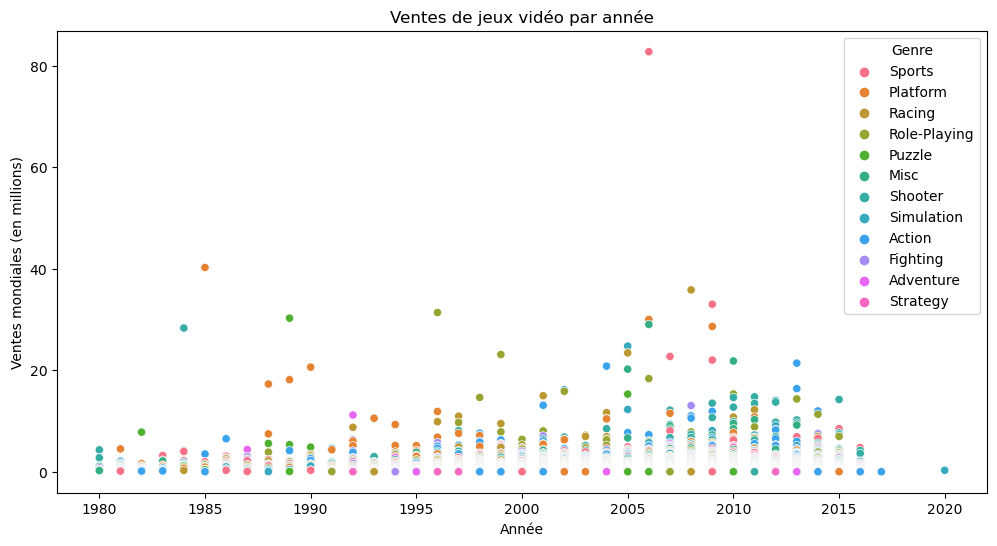

In [7]:
#Nuage de points des ventes par année : Vous pouvez créer un nuage de points pour montrer les ventes de jeux vidéo en fonction de l'année.

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Global_Sales',hue ='Genre', data=df)
plt.xlabel('Année')
plt.ylabel('Ventes mondiales (en millions)')
plt.title('Ventes de jeux vidéo par année')
plt.show()


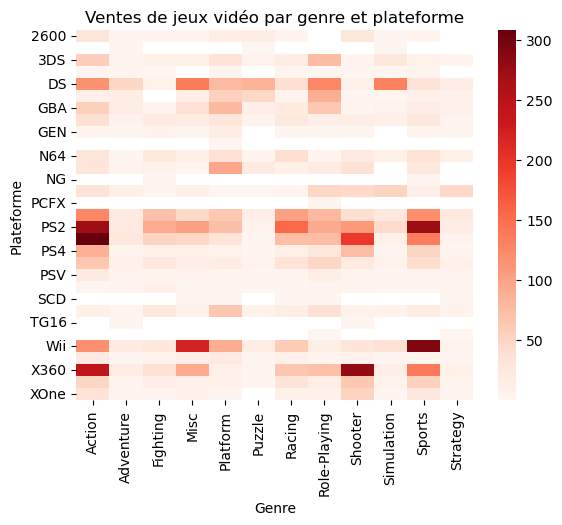

In [8]:
#Carte thermique des ventes par région et plateforme: afficher les ventes de jeux vidéo par région et plateforme.

heatmap_data = df.pivot_table(index='Platform', columns='Genre', values='Global_Sales', aggfunc=sum)
sns.heatmap(heatmap_data, cmap='Reds')
plt.xlabel('Genre')
plt.ylabel('Plateforme')
plt.title('Ventes de jeux vidéo par genre et plateforme')
plt.show()


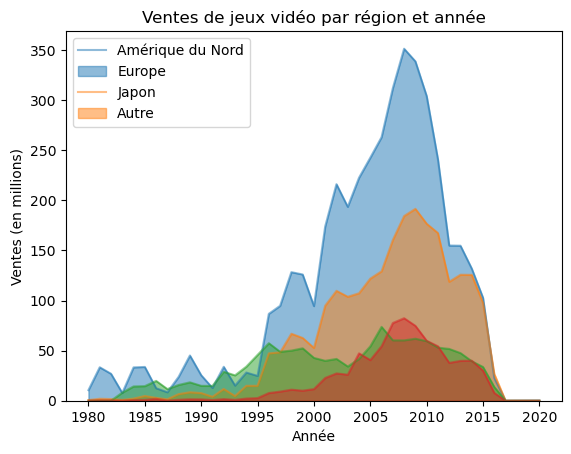

In [9]:
df_region = df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales']].sum()
df_region.plot(kind='area', stacked=False)
plt.xlabel('Année')
plt.ylabel('Ventes (en millions)')
plt.title('Ventes de jeux vidéo par région et année')
plt.legend(labels=['Amérique du Nord', 'Europe', 'Japon','Autre'])
plt.show()


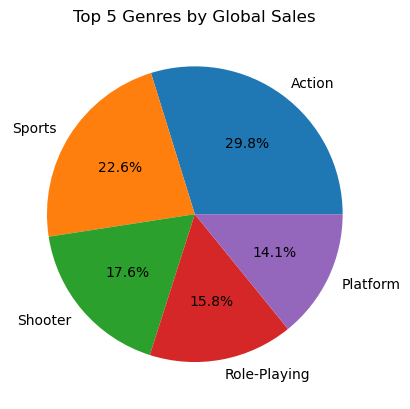

In [10]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)[:5]

plt.pie(genre_sales.values, labels=genre_sales.index, autopct='%1.1f%%')
plt.title('Top 5 Genres by Global Sales')
plt.show()

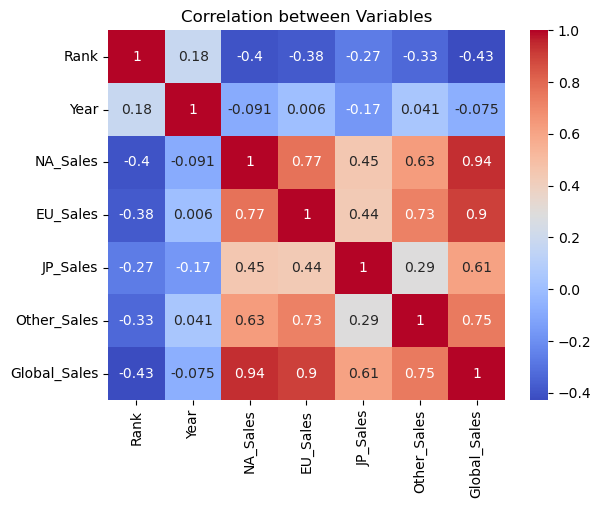

In [11]:
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Variables')
plt.show()

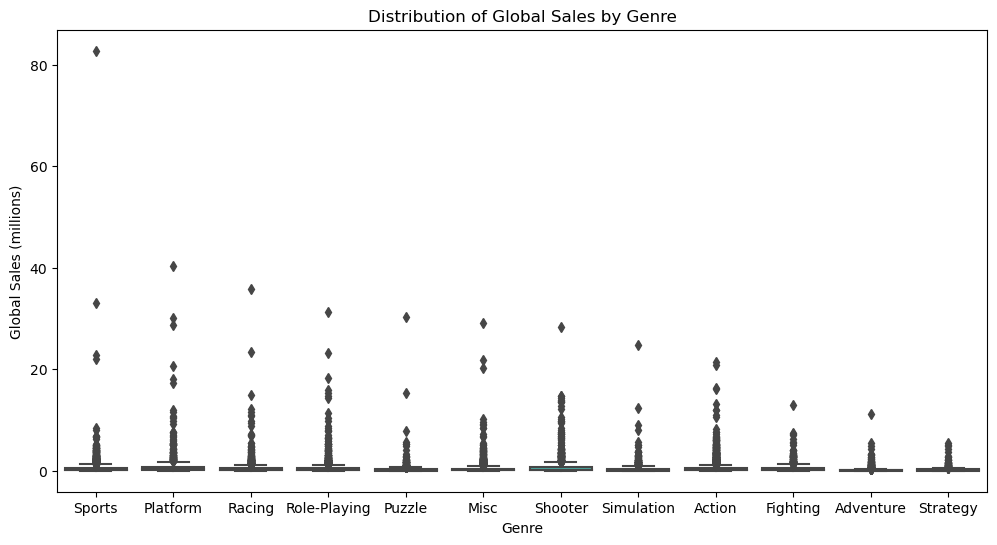

In [12]:
plt.figure(figsize =(12,6))
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.title('Distribution of Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (millions)')
plt.show()

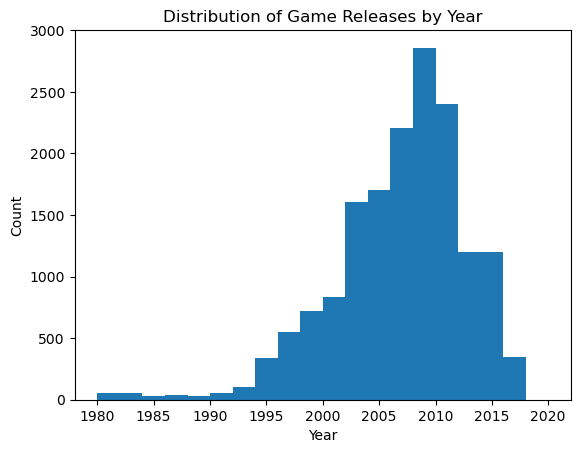

In [13]:
plt.hist(df['Year'], bins=20)
plt.title('Distribution of Game Releases by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

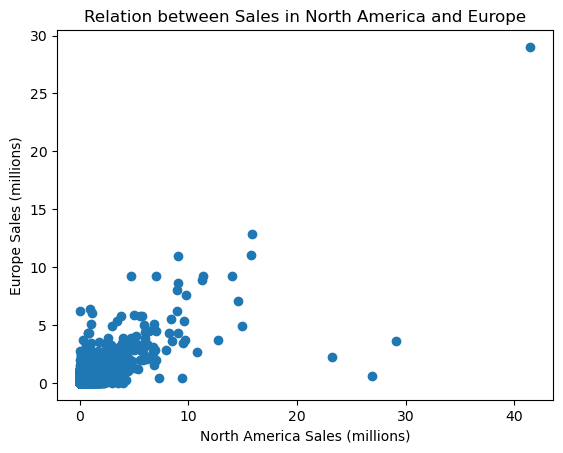

In [14]:
plt.scatter(df['NA_Sales'], df['EU_Sales'])
plt.title('Relation between Sales in North America and Europe')
plt.xlabel('North America Sales (millions)')
plt.ylabel('Europe Sales (millions)')
plt.show()

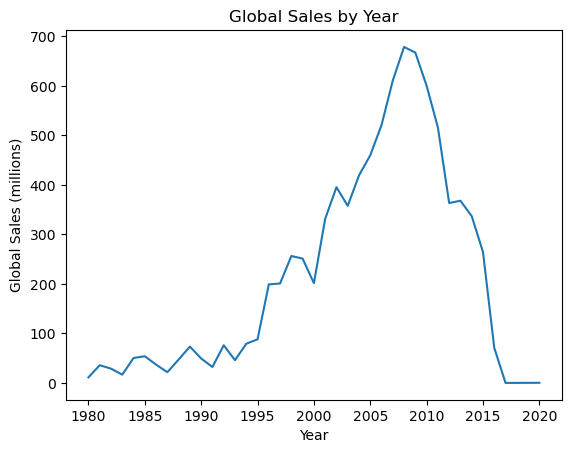

In [15]:
year_sales = df.groupby('Year')['Global_Sales'].sum()

plt.plot(year_sales.index, year_sales.values)
plt.title('Global Sales by Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (millions)')
plt.show()

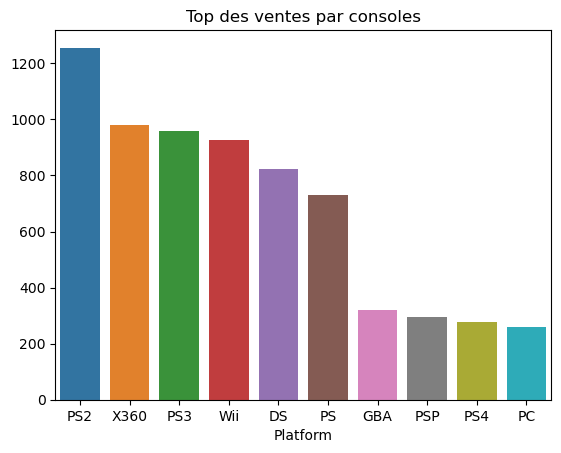

In [16]:
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)[:10]

sns.barplot(x=platform_sales.index, y=platform_sales.values)
plt.title("Top des ventes par consoles")
plt.show()